In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
df=pd.read_csv("SH_SDS_data_4.csv",index_col=0)
prob=pd.read_csv("SH_SDS_transition_matrix.csv",index_col=0)

In [3]:
# rebuild the index of transition matrix
rows=[]
for price_relation_d in range(6):
    for s1_imb_d in range(3):
        for s2_imb_d in range(3):
            s1_imb_d, s2_imb_d, price_relation_d = str(s1_imb_d),str(s2_imb_d),str(price_relation_d)
            rows.append(price_relation_d+s1_imb_d+s2_imb_d)
prob.index=rows

## Given the transition matrix, simulate prices

In [4]:
def simulation(ite, prob, init=['100',100,100]):
    # init: initial states. '100' means simuidual and imbalances states. The later two 100 are initial asset prices
    
    simu = [init]
    tick = 0.01
    current = init  # states and prices

    for i in range(ite):
        state_in = current[0]
        total_prob = prob.loc[state_in,:].sum()
        random_N = np.random.uniform(0,total_prob)
        state_out = prob.loc[state_in][prob.loc[state_in].cumsum() > random_N].index[0]
        price_move = state_out[3:]
        state_out = state_out[:3]
        if price_move == '00':
            current = [state_out, current[1], current[2]]
        elif price_move == '10':
            current = [state_out, current[1]+tick, current[2]]
        elif price_move == '-10':
            current = [state_out, current[1]-tick, current[2]]
        elif price_move == '01':
            current = [state_out, current[1], current[2]+tick]
        elif price_move == '0-1':
            current = [state_out, current[1], current[2]-tick]  
        else:
            raise ValueError("Wrong price movement")
        simu.append(current)
    simu = pd.DataFrame(simu, columns = ['res_imb_states','price_1','price_2'])
    return simu

In [5]:
init=[str(df.current_state.iloc[0]),df.mid1.iloc[0],df.mid2.iloc[0]]
simu = simulation(len(df)//2-1, prob, init)

In [6]:
simu.head()

,res_imb_states,price_1,price_2
0,401,18.965,13.805
1,401,18.965,13.805
2,401,18.965,13.805
3,401,18.965,13.805
4,401,18.965,13.805


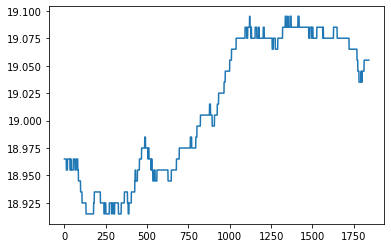

In [7]:
(simu['price_1']).plot()

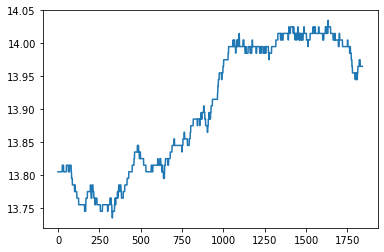

In [8]:
(simu['price_2']).plot()

In [9]:
simu.groupby(['res_imb_states','price_1','price_2']).count()

Empty DataFrame
Columns: []
Index: [(010, 18.924999999999994, 13.765), (010, 18.944999999999997, 13.815), (010, 18.955, 13.815), (010, 19.065000000000015, 14.004999999999995), (010, 19.075000000000017, 14.014999999999995), (010, 19.08500000000002, 14.034999999999995), (011, 18.944999999999997, 13.815), (011, 19.045000000000012, 13.964999999999996), (020, 18.914999999999992, 13.755), (020, 18.924999999999994, 13.775), (020, 18.965, 13.834999999999999), (020, 18.965, 13.844999999999999), (020, 18.995000000000005, 13.884999999999998), (020, 19.005000000000006, 13.894999999999998), (020, 19.03500000000001, 13.944999999999997), (020, 19.03500000000001, 13.954999999999997), (020, 19.065000000000015, 13.994999999999996), (020, 19.065000000000015, 14.004999999999995), (020, 19.075000000000017, 13.994999999999996), (020, 19.075000000000017, 14.014999999999995), (020, 19.075000000000017, 14.024999999999995), (020, 19.08500000000002, 14.024999999999995), (021, 18.914999999999992, 13.755), (021, 18.924999999999994, 13.775), (021, 18.944999999999997, 13.815), (021, 18.955, 13.815), (021, 18.955, 13.825), (021, 18.965, 13.844999999999999), (021, 18.975, 13.844999999999999), (021, 18.975, 13.854999999999999), (021, 18.995000000000005, 13.884999999999998), (021, 19.005000000000006, 13.894999999999998), (021, 19.02500000000001, 13.924999999999997), (021, 19.03500000000001, 13.944999999999997), (021, 19.03500000000001, 13.954999999999997), (021, 19.045000000000012, 13.964999999999996), (021, 19.065000000000015, 13.994999999999996), (021, 19.075000000000017, 13.994999999999996), (021, 19.075000000000017, 14.004999999999995), (021, 19.075000000000017, 14.014999999999995), (021, 19.075000000000017, 14.024999999999995), (021, 19.08500000000002, 14.014999999999995), (110, 18.914999999999992, 13.755), (110, 18.914999999999992, 13.765), (110, 18.924999999999994, 13.765), (110, 18.934999999999995, 13.785), (110, 18.944999999999997, 13.805), (110, 18.955, 13.815), (110, 18.975, 13.854999999999999), (110, 18.985000000000003, 13.864999999999998), (110, 19.005000000000006, 13.894999999999998), (110, 19.03500000000001, 13.954999999999997), (110, 19.045000000000012, 13.974999999999996), (110, 19.055000000000014, 13.974999999999996), (110, 19.075000000000017, 13.994999999999996), (110, 19.075000000000017, 14.004999999999995), (110, 19.08500000000002, 14.004999999999995), (110, 19.08500000000002, 14.014999999999995), (110, 19.08500000000002, 14.024999999999995), (111, 18.914999999999992, 13.755), (111, 18.914999999999992, 13.765), (111, 18.924999999999994, 13.765), (111, 18.934999999999995, 13.785), (111, 18.944999999999997, 13.805), (111, 18.955, 13.805), (111, 18.955, 13.815), (111, 18.955, 13.825), (111, 18.965, 13.825), (111, 18.975, 13.844999999999999), (111, 18.975, 13.854999999999999), (111, 18.985000000000003, 13.864999999999998), (111, 18.995000000000005, 13.874999999999998), (111, 19.005000000000006, 13.894999999999998), (111, 19.015000000000008, 13.904999999999998), (111, 19.03500000000001, 13.954999999999997), (111, 19.045000000000012, 13.954999999999997), (111, 19.045000000000012, 13.974999999999996), (111, 19.055000000000014, 13.974999999999996), (111, 19.075000000000017, 13.994999999999996), (111, 19.075000000000017, 14.004999999999995), (111, 19.075000000000017, 14.014999999999995), (111, 19.08500000000002, 14.004999999999995), (111, 19.08500000000002, 14.014999999999995), (111, 19.08500000000002, 14.024999999999995), (112, 18.934999999999995, 13.785), (112, 18.955, 13.825), (112, 19.08500000000002, 14.014999999999995), (120, 18.924999999999994, 13.765), (120, 18.924999999999994, 13.775), (120, 18.944999999999997, 13.805), (120, 18.955, 13.815), (120, 18.955, 13.825), (120, 18.975, 13.854999999999999), (120, 19.045000000000012, 13.954999999999997), (120, 19.075000000000017, 13.994999999999996), (120, 19.075000000000017, 14.004999999999995), (120, 19.08500000000002, 14.014999999999995), (120, 19.08500000000002, 14.024999999999995), (121, 18.9149

In [10]:
simu.to_csv('simulated_prices.csv')

## For each state, simulate the expected price movement after certain number of steps forward and certain number of paths to average from.

In [11]:
def simulation2(ite, prob, init=['100',100,100]):
    # init: initial states. '100' means simuidual and imbalances states. The later two 100 are initial asset prices
    
    tick = 0.01
    current = init  # states and prices
    state_existed = True
    
    for i in range(ite):
        state_in = current[0]
        total_prob = prob.loc[state_in,:].sum()
        
        if total_prob==0:
            state_existed = False
            break
        
        random_N = np.random.uniform(0,total_prob)
        state_out = prob.loc[state_in][prob.loc[state_in].cumsum() > random_N].index[0]
        price_move = state_out[3:]
        state_out = state_out[:3]
        if price_move == '00':
            current = [state_out, current[1], current[2]]
        elif price_move == '10':
            current = [state_out, current[1]+tick, current[2]]
        elif price_move == '-10':
            current = [state_out, current[1]-tick, current[2]]
        elif price_move == '01':
            current = [state_out, current[1], current[2]+tick]
        elif price_move == '0-1':
            current = [state_out, current[1], current[2]-tick]  
        else:
            raise ValueError("Wrong price movement")
        
    simu_forward_prices = current[1:]
    return simu_forward_prices, state_existed

In [18]:
def simulate_exp_move(init_price1,init_price2,forward_steps=50,paths=1000):
    simu_move=pd.DataFrame(index=rows,columns=['exp_dp1','exp_dp2'])
    
    for state in rows:
        dp1=0
        dp2=0
        for _ in range(paths):
            simu = simulation2(forward_steps, prob, [state,init_price1,init_price2])
            if not simu[1]:
                break
            dp1+=simu[0][0]-init_price1
            dp2+=simu[0][1]-init_price2
        simu_move.loc[state,:]=[dp1/paths,dp2/paths]
        
    return simu_move

In [19]:
init_price1=df.mid1.iloc[0]
init_price2=df.mid2.iloc[0]

In [20]:
%time
simu_move=simulate_exp_move(init_price1,init_price2)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 24.1 µs


In [24]:
simu_move

,exp_dp1,exp_dp2
000,0,0
001,0,0
002,0,0
010,0.00311,-0.0054
011,0.00544,-0.00336
012,0,0
020,0.00418,-0.0052
021,0.00673,-0.00165
022,0,0
100,0,0


In [25]:
simu_move.to_csv('simulated_exp_dp.csv')

In [26]:
pd.concat([(simu_move['exp_dp1'].abs()+simu_move['exp_dp2'].abs()).sort_values(ascending=False), simu_move['exp_dp1'],simu_move['exp_dp2']], axis=1)

,0,exp_dp1,exp_dp2
220,0.01067,0.00554,0.00513
512,0.00953,-0.00282,0.00671
502,0.00946,-0.00453,0.00493
020,0.00938,0.00418,-0.0052
011,0.0088,0.00544,-0.00336
010,0.00851,0.00311,-0.0054
511,0.00842,-0.00707,0.00135
501,0.00841,-0.00615,0.00226
021,0.00838,0.00673,-0.00165
302,0.00792,-0.00451,-0.00341
